# Solving PDEs with FEniCS using Spatially Adaptive Combination Technique

## 2D Poisson Equation
In this example we are using UnitSquare2DPoissonDirichletBC function wich defines a 2D Poisson equation over a square domain with Dirichlet boundary conditions


 \begin{equation}
  \begin{split}
   -\nabla²(x)=f(x),\; x\,in\,\Omega,\\
   u(x)=u_D(x),\;x\,on\,\delta\Omega.
  \end{split}
 \end{equation}
 


In [3]:
%matplotlib inline
from sys import path
path.append('../src/')
path.append('../PDE')

from fenics import *
import matplotlib.pyplot as plt
import numpy as np

from StandardCombi import *
from GridOperation import *
from ComponentGridInfo import *
from PDE_Solver import *




Lets define boundary values u_D and right hand side f to be:
 \begin{equation}
  u_D(x) = 1 + x_0^2 + x_1^2, \\
  f(x) = -6.
 \end{equation}

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution [[ 1.          1.14306641  1.78613281  0.49951172  0.45507812  1.80908203
   1.43652344  1.74365234  2.55078125  0.66748047 -0.00488281  1.16650391
   0.64257812  0.77490234  1.40722656  0.17236328  0.1171875 ]
 [ 1.50097656  1.39404297  1.87011719  0.80224609  0.61523437  1.89599609
   1.72851562  1.89501953  2.640625    1.16357422  0.54394531  1.54443359
   1.12402344  0.97705078  1.40527344  0.23876953 -0.09375   ]
 [ 2.07226562  1.71533203  2.02441406  1.17529297  0.84570312  2.05322266
   2.09082031  2.11669922  2.80078125  1.72998047  1.16308594  1.99267578
   1.67578125  1.24951172  1.47363281  0.37548828 -0.234375  ]
 [ 2.25292969  1.61083984  1.71777344  1.05224609  0.54492187  1.64404297
   1.8515625   1.70166016  2.2890625   1.58935547  1.04003906  1.66357422
   1.41503906  0.95947266  1.22949219  0.44970703 -0.1875    ]
 [ 2.50390625  1.57666016  1.48144531  0.9995117

([<ComponentGridInfo.ComponentGridInfo at 0x7fee601b7eb8>,
 2.34765625,
 array([[ 1.        ,  1.14306641,  1.78613281,  0.49951172,  0.45507812,
          1.80908203,  1.43652344,  1.74365234,  2.55078125,  0.66748047,
         -0.00488281,  1.16650391,  0.64257812,  0.77490234,  1.40722656,
          0.17236328,  0.1171875 ],
        [ 1.50097656,  1.39404297,  1.87011719,  0.80224609,  0.61523437,
          1.89599609,  1.72851562,  1.89501953,  2.640625  ,  1.16357422,
          0.54394531,  1.54443359,  1.12402344,  0.97705078,  1.40527344,
          0.23876953, -0.09375   ],
        [ 2.07226562,  1.71533203,  2.02441406,  1.17529297,  0.84570312,
          2.05322266,  2.09082031,  2.11669922,  2.80078125,  1.72998047,
          1.16308594,  1.99267578,  1.67578125,  1.24951172,  1.47363281,
          0.37548828, -0.234375  ],
        [ 2.25292969,  1.61083984,  1.71777344,  1.05224609,  0.54492187,
          1.64404297,  1.8515625 ,  1.70166016,  2.2890625 ,  1.58935547,
      

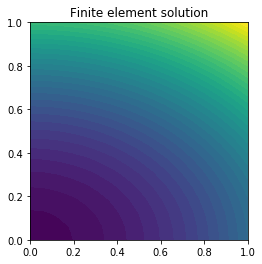

In [4]:
import numpy as np

dim = 2
a = np.zeros(dim)
b = np.ones(dim)
grid = GlobalGrid(a=a, b=b, boundary=True)

minimum_level = 1
maximum_level = 4
n = (2**maximum_level)*np.ones(dim, dtype=int)

poisson2D = Poisson('-6.0', 1, '1 + x[0]*x[0] + 2*x[1]*x[1]', 2, '1 + x[0]*x[0] + 2*x[1]*x[1]', 2)
poisson2D.solve(n)
reference_solution = poisson2D.get_vertex_values()
poisson2D.plot_solution()

operation = PDE_Solve(solver=poisson2D, maxlv=tuple(maximum_level*np.ones(dim, dtype=int)), grid=grid, reference_solution=reference_solution)
combiObject = StandardCombi(a, b, operation=operation)

# Solve PDE using standard Combination Technique
combiObject.perform_operation(minimum_level, maximum_level)
# combiObject.plot()

# Results
# combiObject.print_resulting_combi_scheme(markersize=5)